In [1]:
from src import *

import numpy as np
# Data analysis and manipulation tool for python
import pandas as pd

# Plotting library
import matplotlib.pyplot as plt 

import datetime as dt

# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [2]:
raw_regression_data = pd.read_csv('Datasetv2.csv')
raw_regression_data.drop('Unnamed: 0', axis=1, inplace=True)
raw_regression_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159676 entries, 0 to 159675
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   date                 159676 non-null  object 
 1   address              159676 non-null  object 
 2   price                159676 non-null  int64  
 3   changes              159676 non-null  object 
 4   saleable_area(ft^2)  159676 non-null  object 
 5   unit_rate            159676 non-null  int64  
 6   district             159676 non-null  object 
 7   Tower                60395 non-null   object 
 8   Flat                 152252 non-null  object 
 9   Phase                48336 non-null   object 
 10  Block                54679 non-null   object 
 11  Rental               159676 non-null  bool   
 12  Public Housing       159676 non-null  bool   
 13  floor                159676 non-null  float64
dtypes: bool(2), float64(1), int64(2), object(9)
memory usage: 14.9+ MB


In [3]:
raw_regression_data = raw_regression_data[raw_regression_data['Rental'] == True]

# Drop the 'Rental' and 'changes' columns from the filtered DataFrame
raw_regression_data = raw_regression_data.drop(columns=['Rental', 'changes', 'Block', 'Flat', 'Tower', 'address'])

#Processing date
raw_regression_data['date'] = pd.to_datetime(raw_regression_data['date'])
raw_regression_data['date'] = raw_regression_data['date'].map(dt.datetime.toordinal)

# Remove commas from the 'saleable_area(ft^2)' column
raw_regression_data['saleable_area(ft^2)'] = raw_regression_data['saleable_area(ft^2)'].str.replace(',', '')

# Convert the column to int64
raw_regression_data['saleable_area(ft^2)'] = raw_regression_data['saleable_area(ft^2)'].astype('int64')

C:\Users\Hayden Ng\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '31/12/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Hayden Ng\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '30/12/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Hayden Ng\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '29/12/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Hayden Ng\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '28/12/2022' in DD/MM/YYYY format. Provide form

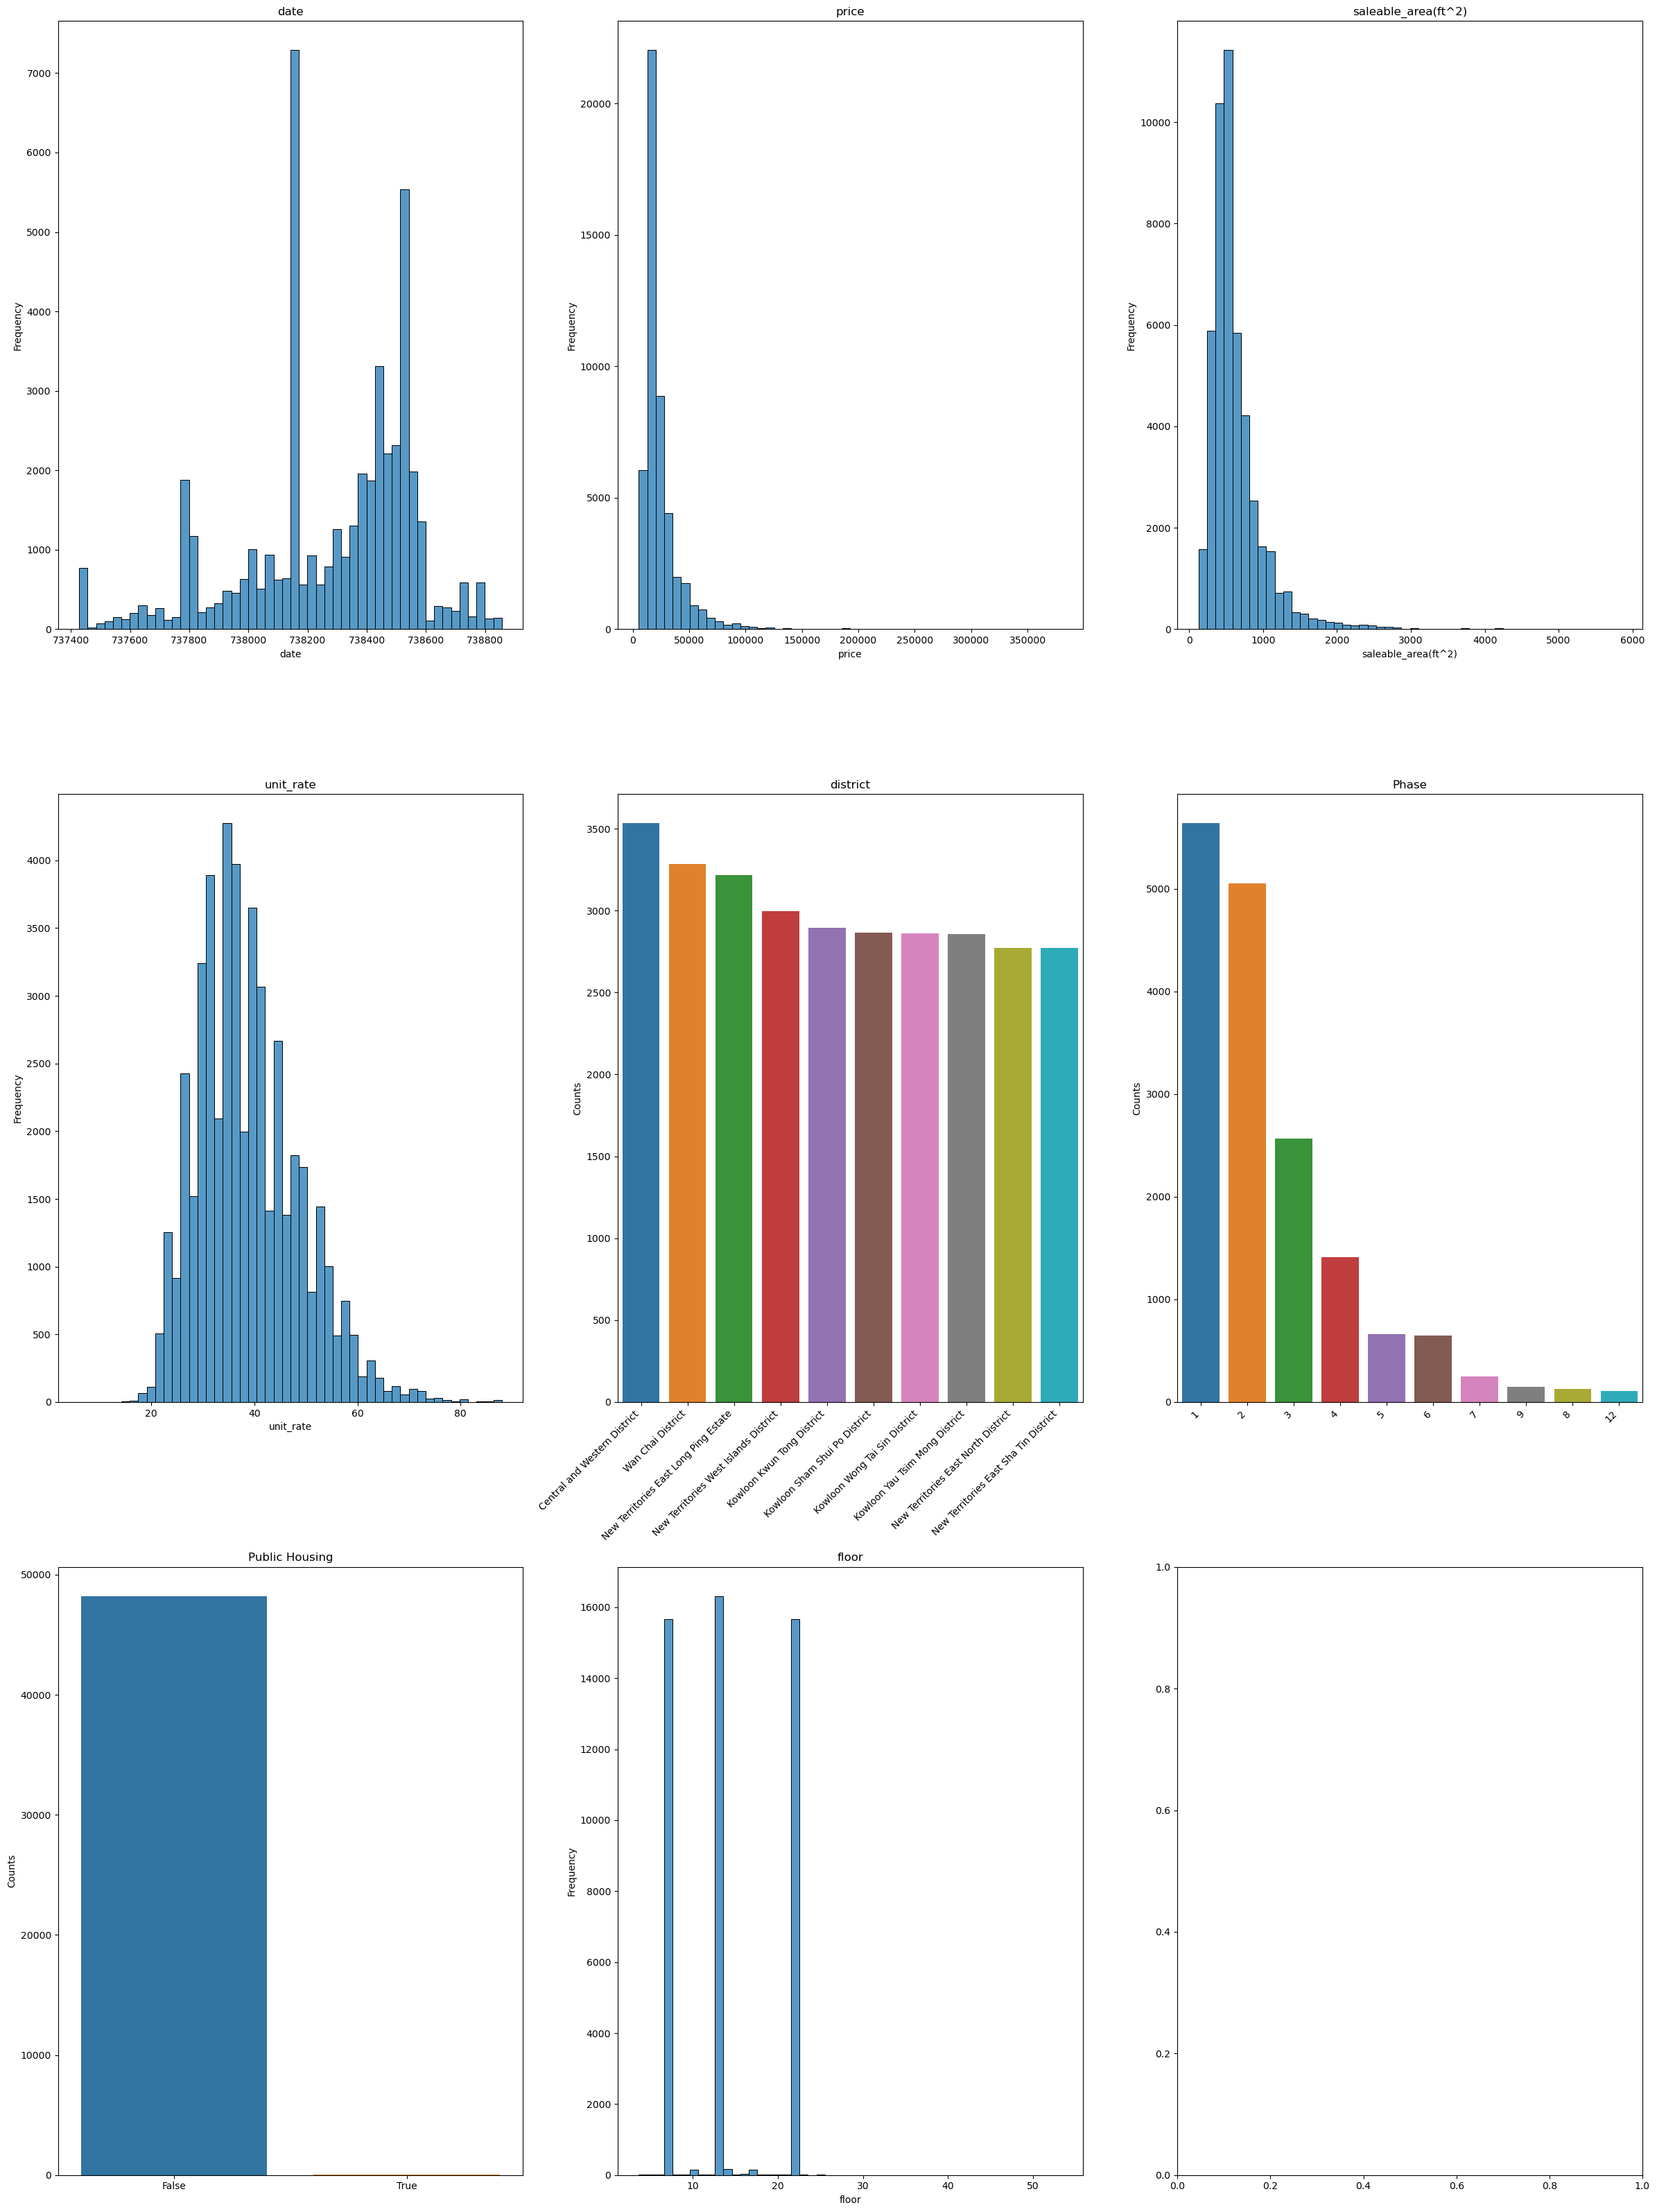

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Assuming raw_regression_data is your pandas DataFrame

# Setup the figure and axes for a 5x3 grid (15 subplots)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(24, 32))
axes = axes.flatten()  # Flatten to 1D array for easy iteration

# Iterate over each column for plotting
for i, column in enumerate(raw_regression_data.columns):
    ax = axes[i]
    
    # For categorical data
    if raw_regression_data[column].dtype == 'object':
        value_counts = raw_regression_data[column].value_counts().head(10)  # Top 10 categories
        sns.barplot(x=value_counts.index, y=value_counts, ax=ax)
        ax.set_title(column)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotate x labels for better fit
        ax.set_ylabel('Counts')

    # For boolean data
    elif raw_regression_data[column].dtype == 'bool':
        value_counts = raw_regression_data[column].value_counts()
        sns.barplot(x=value_counts.index, y=value_counts, ax=ax)
        ax.set_title(column)
        ax.set_xticklabels(['False', 'True'])  # Explicitly set x labels for clarity
        ax.set_ylabel('Counts')

    # For numerical data
    else:
        sns.histplot(raw_regression_data[column].dropna(), bins=50, kde=False, ax=ax)
        ax.set_title(column)
        ax.set_ylabel('Frequency')

    # Hide plots for any excess axes
    if i >= len(raw_regression_data.columns):
        ax.set_visible(False)

plt.tight_layout()
plt.show()

In [5]:
regression_data = pd.get_dummies(raw_regression_data)

In [6]:
data = regression_data.copy()
data.drop('price', axis=1, inplace=True)
data_x = data.values
data_y = np.atleast_2d(regression_data['price'].values).T


x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, train_ratio=0.85)
x_train, x_test, scaling_parameters = scale_feature(x_train, x_test, method='min_max')


x_train = np.concatenate([np.ones((x_train.shape[0], 1)), x_train], axis=1)
x_test = np.concatenate([np.ones((x_test.shape[0], 1)), x_test], axis=1)
y_train = np.log(y_train)
y_test = np.log(y_test)

In [7]:
alpha = 0.02 # learning rate
num_iters = 10000 # maximal iteration times
m, n = x_train.shape

In [8]:
# learned parameters
theta = np.random.rand(n, 1)
# record list
acc_train_list = list()
acc_test_list = list()
cost_list = list()
record_iters = list()
# training iterations
for k in range(num_iters):
    
    # Task 11:
    # ====================== START YOUR CODE HERE ======================
    # 1. compute current cost value
    # 2. compute and update theta parameters with gradient descent
    cost = cost_computation(theta, x_train, y_train)
    theta = gradient_descent(theta, x_train, y_train, alpha)
    # ======================= END YOUR CODE HERE =======================
    
    if k % 100 == 0:
        acc_train = .0
        acc_test = .0
        
        acc_train = evaluation(theta, x_train, y_train)
        acc_test = evaluation(theta, x_test, y_test)
        
        acc_train_list.append(acc_train)
        acc_test_list.append(acc_test)
        cost_list.append(cost)
        record_iters.append(k)
        
        # print output 
        print('Iteration {}: training MSE: {:.4f}, testing MSE: {:.4f}'.format(k, acc_train, acc_test))
    if cost < 1.0e-4:
        break

Iteration 0: training MSE: 69.9589, testing MSE: 70.0228
Iteration 100: training MSE: 1.1249, testing MSE: 1.1532
Iteration 200: training MSE: 0.8910, testing MSE: 0.9145
Iteration 300: training MSE: 0.7763, testing MSE: 0.7962
Iteration 400: training MSE: 0.6850, testing MSE: 0.7019
Iteration 500: training MSE: 0.6114, testing MSE: 0.6260
Iteration 600: training MSE: 0.5516, testing MSE: 0.5643
Iteration 700: training MSE: 0.5025, testing MSE: 0.5136
Iteration 800: training MSE: 0.4616, testing MSE: 0.4715
Iteration 900: training MSE: 0.4273, testing MSE: 0.4361
Iteration 1000: training MSE: 0.3981, testing MSE: 0.4061
Iteration 1100: training MSE: 0.3730, testing MSE: 0.3803
Iteration 1200: training MSE: 0.3513, testing MSE: 0.3579
Iteration 1300: training MSE: 0.3321, testing MSE: 0.3383
Iteration 1400: training MSE: 0.3152, testing MSE: 0.3209
Iteration 1500: training MSE: 0.3001, testing MSE: 0.3054
Iteration 1600: training MSE: 0.2865, testing MSE: 0.2915
Iteration 1700: training

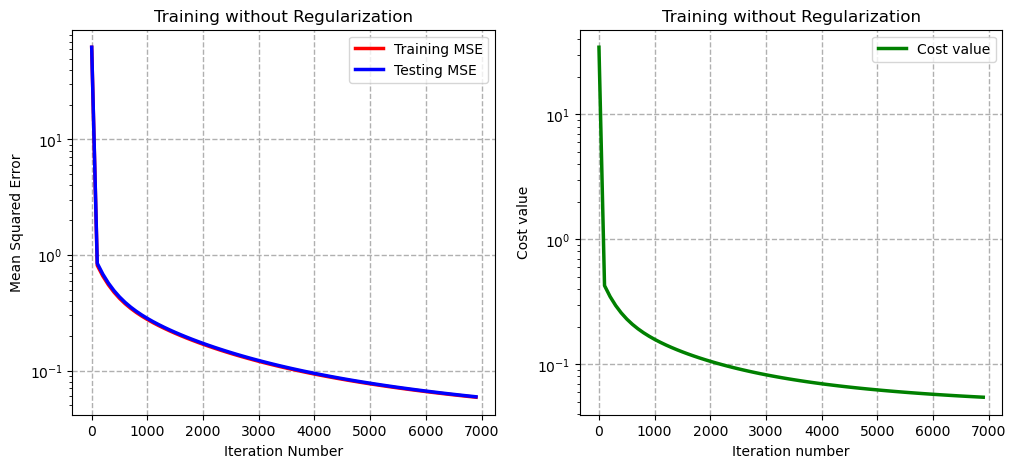

In [27]:
# training and testing accuracy visualization
fig = plt.figure(figsize=(12, 5))
(ax1, ax2) = fig.subplots(1, 2)

# figure 1 wiht axis 1
ax1.plot(record_iters, acc_train_list, color='r', linewidth=2.5, label='Training MSE')
ax1.plot(record_iters, acc_test_list, color='b', linewidth=2.5, label='Testing MSE')
ax1.set_yscale('log')
ax1.grid(linestyle='--', linewidth=1)
ax1.legend()
ax1.set_title('Training without Regularization')
ax1.set_xlabel('Iteration Number')
ax1.set_ylabel('Mean Squared Error');

# figure 2 wiht axis 2
ax2.plot(record_iters, cost_list, color='g', linewidth=2.5, label='Cost value')
ax2.set_yscale('log')
ax2.grid(linestyle='--', linewidth=1)
ax2.legend(loc='upper right')
ax2.set_title('Training without Regularization')
ax2.set_xlabel('Iteration number')
ax2.set_ylabel('Cost value');

In [11]:
# learned parameters
regularized_theta = np.random.rand(n, 1)
lamda = 20
alpha = 0.03 # learning rate
num_iters = 7000

# record list
acc_train_list = list()
acc_test_list = list()
cost_list = list()
record_iters = list()

for k in range(num_iters):
    
    # Task 12:　
    # ====================== START YOUR CODE HERE ======================
    # 1. compute current cost value
    # 2. compute and update theta parameters with regularized gradient descent
    cost = regularized_cost_computation(regularized_theta, x_train, y_train, lamda)
    regularized_theta = regularized_gradient_descent(regularized_theta, x_train, y_train, alpha, lamda)
    # ====================== END YOUR CODE HERE ======================
    
    if k % 100 == 0:
        acc_train = .0
        acc_test = .0

        acc_train = evaluation(regularized_theta, x_train, y_train)
        acc_test = evaluation(regularized_theta, x_test, y_test)
        
        acc_train_list.append(acc_train)
        acc_test_list.append(acc_test)
        cost_list.append(cost)
        record_iters.append(k)
        
        # print output 
        print('Iteration {}: training MSE: {:.4f}, testing MSE: {:.4f}'.format(k, acc_train, acc_test))
    if cost < 1.0e-4:
        break

Iteration 0: training MSE: 62.6211, testing MSE: 62.7605
Iteration 100: training MSE: 0.8133, testing MSE: 0.8475
Iteration 200: training MSE: 0.6575, testing MSE: 0.6825
Iteration 300: training MSE: 0.5521, testing MSE: 0.5712
Iteration 400: training MSE: 0.4769, testing MSE: 0.4920
Iteration 500: training MSE: 0.4214, testing MSE: 0.4336
Iteration 600: training MSE: 0.3790, testing MSE: 0.3891
Iteration 700: training MSE: 0.3456, testing MSE: 0.3542
Iteration 800: training MSE: 0.3185, testing MSE: 0.3259
Iteration 900: training MSE: 0.2959, testing MSE: 0.3024
Iteration 1000: training MSE: 0.2767, testing MSE: 0.2825
Iteration 1100: training MSE: 0.2601, testing MSE: 0.2654
Iteration 1200: training MSE: 0.2454, testing MSE: 0.2503
Iteration 1300: training MSE: 0.2324, testing MSE: 0.2369
Iteration 1400: training MSE: 0.2207, testing MSE: 0.2249
Iteration 1500: training MSE: 0.2101, testing MSE: 0.2140
Iteration 1600: training MSE: 0.2005, testing MSE: 0.2041
Iteration 1700: training

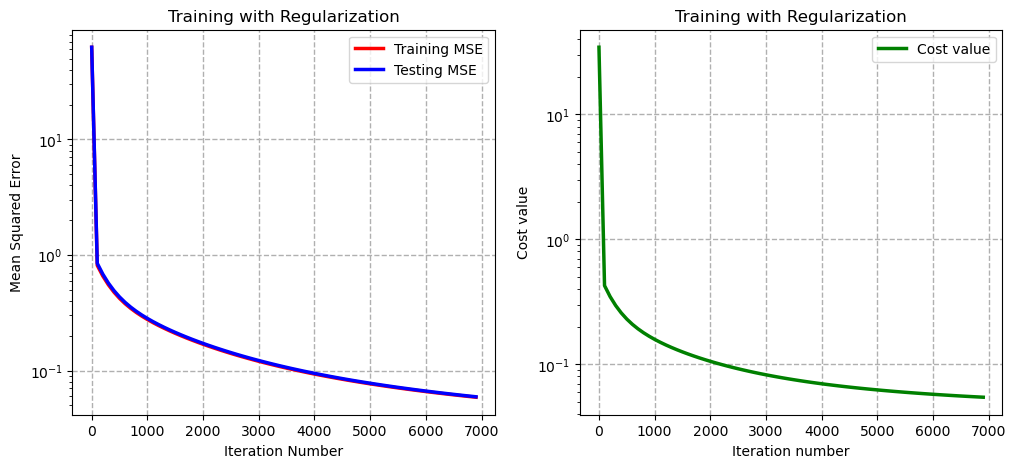

In [12]:
# training and testing accuracy visualization
fig = plt.figure(figsize=(12, 5))
(ax1, ax2) = fig.subplots(1, 2)

ax1.plot(record_iters, acc_train_list, color='r', linewidth=2.5, label='Training MSE')
ax1.plot(record_iters, acc_test_list, color='b', linewidth=2.5, label='Testing MSE')
ax1.set_yscale('log')
ax1.grid(linestyle='--', linewidth=1)
ax1.legend()
ax1.set_title('Training with Regularization')
ax1.set_xlabel('Iteration Number')
ax1.set_ylabel('Mean Squared Error');

# figure 2 wiht axis 2
ax2.plot(record_iters, cost_list, color='g', linewidth=2.5, label='Cost value')
ax2.set_yscale('log')
ax2.grid(linestyle='--', linewidth=1)
ax2.legend(loc='upper right')
ax2.set_title('Training with Regularization')
ax2.set_xlabel('Iteration number')
ax2.set_ylabel('Cost value');

In [26]:
# ramdom data item generation from testing dataset
random_idx = np.random.randint(0, x_test.shape[0], size=5)
sample_x_test = x_test[random_idx, :]
sample_y_test = y_test[random_idx, :]

# sampled data visualization
raw_sample_data = pd.DataFrame(inverse_scale_feature(sample_x_test[:, 1:], scaling_parameters, method='min_max'), columns=data.columns)
raw_sample_data['Real_Price'] = np.exp(sample_y_test)



pred_y_test_01 = np.exp(hypothesis(theta, sample_x_test).astype(float))
pred_y_test_02 = np.exp(hypothesis(regularized_theta, sample_x_test).astype(float))
raw_sample_data['Predicted_Price_01'] = pred_y_test_01 # without regularization
raw_sample_data['Predicted_Price_02'] = pred_y_test_02 # with regularization
raw_sample_data.head()

,date,saleable_area(ft^2),unit_rate,Public Housing,floor,district_Central and Western District,district_HKIsIand Eastern District,district_HKIsIand Southern District,district_Kowloon Kowloon City District,district_Kowloon Kwun Tong District,...,Phase_6,Phase_7,Phase_8,Phase_9,Phase_A,Phase_B,Phase_I,Real_Price,Predicted_Price_01,Predicted_Price_02
0,737800.0,512.0,37.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18800.0,17188.012330,16877.905189
1,737799.0,734.0,40.0,0.0,7.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29000.0,22793.903127,22288.401025
2,738420.0,367.0,46.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16800.0,20299.821876,20269.292946
3,738523.0,932.0,26.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23800.0,21712.798517,22027.117132
4,738157.0,550.0,31.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16800.0,18527.774189,18323.586236
